In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
from pyuvis import QUBE

In [26]:
lbl = '/Volumes/Data/backup/data/uvis/EUV2010_137_23_20.LBL'

In [4]:
import pvl

In [10]:
lblwrapper = pvl.io.open(lbl)

In [15]:
label = pvl.load(lbl)

In [18]:
label.keys()

dict_keys(['^QUBE', 'CENTRAL_BODY_DISTANCE', 'RECORD_TYPE', 'DECLINATION', 'RIGHT_ASCENSION', 'MISSION_PHASE_NAME', 'DESCRIPTION', 'OBSERVATION_ID', 'INSTRUMENT_HOST_NAME', 'PDS_VERSION_ID', 'INCIDENCE_ANGLE', 'COMPRESSION_TYPE', 'PRODUCT_ID', 'INSTRUMENT_ID', 'SUB_SPACECRAFT_LATITUDE', 'INSTRUMENT_NAME', 'SC_PLANET_POSITION_VECTOR', 'HI_VOLTAGE_POWER_SUPPLY_STATE', 'TEST_PULSE_STATE', 'SC_SUN_POSITION_VECTOR', 'PLANET_CENTER_POSITION_VECTOR', 'INTEGRATION_DURATION', 'SUB_SPACECRAFT_LONGITUDE', 'SUB_SOLAR_LONGITUDE', 'SPACECRAFT_CLOCK_START_COUNT', 'SC_SUN_VELOCITY_VECTOR', 'RECORD_BYTES', 'EMISSION_ANGLE', 'PHASE_ANGLE', 'SC_PLANET_VELOCITY_VECTOR', 'ODC_ID', 'SC_TARGET_POSITION_VECTOR', 'SC_TARGET_VELOCITY_VECTOR', 'SUB_SOLAR_LATITUDE', 'OCCULTATION_PORT_STATE', 'SLIT_STATE', 'SPACECRAFT_CLOCK_STOP_COUNT', 'TARGET_NAME', 'PRODUCT_CREATION_TIME', 'QUBE', 'STOP_TIME', 'FILE_RECORDS', 'PLANET_CENTER_VELOCITY_VECTOR', 'DATA_SET_ID', 'START_TIME'])

In [23]:
tuple(label['QUBE']['CORE_ITEMS'])

(1024, 64, 9748)

In [20]:
cat {lbl}

In [28]:
qube = QUBE(lbl)

LabelObject([
  ('AXES', 3)
  ('AXIS_NAME', ['BAND', 'LINE', 'SAMPLE'])
  ('CORE_ITEMS', [1024, 64, 9748])
  ('CORE_ITEM_BYTES', 2)
  ('CORE_ITEM_TYPE', 'MSB_UNSIGNED_INTEGER')
  ('CORE_BASE', 0.0)
  ('CORE_MULTIPLIER', 1.0)
  ('CORE_VALID_MINIMUM', 'N/A')
  ('CORE_NULL', -1)
  ('CORE_LOW_REPR_SATURATION', 'N/A')
  ('CORE_LOW_INSTR_SATURATION', 'N/A')
  ('CORE_HIGH_INSTR_SATURATION', 'N/A')
  ('CORE_HIGH_REPR_SATURATION', 'N/A')
  ('CORE_NAME', 'RAW_DATA_NUMBER')
  ('CORE_UNIT', 'COUNTS/BIN')
  ('BAND_BIN_CENTER', 'N/A')
  ('SUFFIX_BYTES', 4)
  ('SUFFIX_ITEMS', [0, 0, 0])
  ('DESCRIPTION',
   'This UVIS Qube is a 3 dimensional matrix of 2 byte integers. The Qube '
   'represents a time series of two dimensional (spectral x spatial) matrices. '
   'Each two dimensional matrix is made up of counts taken by the detector '
   'during a fixed time interval. The fixed time interval is specified in the '
   'INTEGRATION_DURATION keyword. If the two dimensional matrix has a LINE '
   'magnitud

In [19]:
from IPython.html.widgets import interactive

In [20]:
qube.shape

(1024, 64, 2)

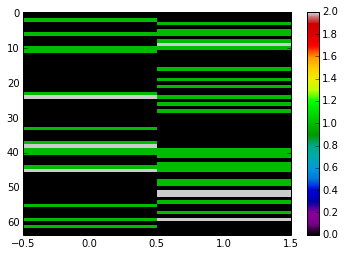

In [21]:
def show_slice(i):
    im = plt.imshow(qube.data[i], aspect='auto', interpolation='nearest',
           cmap=plt.cm.spectral)
    plt.colorbar(im, ax=plt.gca())
interactive(show_slice, i=(0,qube.shape[0]))

The preview data from the UVIS data catalog seems to be often the mean value over the bands, at least I could match the preview images quite often. Just for your data file, it does not make sense yet, but maybe because of the missing binning implementation.

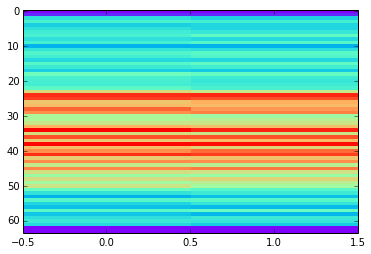

In [22]:
plt.imshow(qube.data.mean(axis=0), aspect='auto', interpolation='nearest',
           cmap=plt.cm.rainbow)